<a href="https://colab.research.google.com/github/maimoonagul/Chat-Application/blob/main/Maimoona.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Phase_1: Mount Google Drive**



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Phase_2: Install Library**

In [ ]:
pip install sentence-transformers

## **Phase_3: Layout Recommendation System**

In [ ]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity, euclidean_distances
from IPython.display import HTML, display, Javascript
import pandas as pd

# Load your dataset
dataset_path = '/content/drive/MyDrive/Mitigation_Strategies.csv'
df = pd.read_csv(dataset_path)

# Load a pre-trained BERT model
bert_model_name = 'bert-base-uncased'
model = SentenceTransformer(bert_model_name)

# Function to get recommendations based on similarity
def get_recommendations(input_challenge, challenges_column, strategies_column, top_n=5, similarity_threshold=0.5, similarity_metric='cosine'):
    # Encode all challenges and mitigation strategies using BERT
    challenge_embeddings = model.encode(df[challenges_column].astype(str).tolist(), convert_to_tensor=True)
    strategy_embeddings = model.encode(df[strategies_column].astype(str).tolist(), convert_to_tensor=True)

    # Encode input challenge using BERT
    input_embedding = model.encode(input_challenge, convert_to_tensor=True)

    # Reshape input arrays to 2D
    input_embedding = input_embedding.reshape(1, -1)
    challenge_embeddings = challenge_embeddings.reshape(len(df), -1)

    # Calculate similarity based on the selected metric
    if similarity_metric == 'cosine':
        similarities = cosine_similarity(input_embedding, challenge_embeddings)
    elif similarity_metric == 'euclidean':
        similarities = 1 / (1 + euclidean_distances(input_embedding, challenge_embeddings))
    else:
        raise ValueError("Invalid similarity_metric. Choose 'cosine' or 'euclidean'.")

    # Get indices of top N similar challenges
    top_indices = similarities.argsort()[0][-top_n:][::-1]

    # Filter challenges based on similarity threshold
    filtered_indices = [i for i in top_indices if similarities[0][i] >= similarity_threshold]

    # Get top N similar mitigation strategies
    top_strategies = df.iloc[filtered_indices][:top_n][strategies_column].tolist()

    return top_strategies

# Render HTML and JavaScript for the recommendation system
html_content = '''
<style>
    body {
        font-family: Arial, sans-serif;
        background-color: #f8f9fa;
        margin: 0;
        padding: 0;
    }

    .container {
        max-width: 600px;
        margin: 50px auto;
        padding: 20px;
        background-color: #fff;
        border-radius: 5px;
        box-shadow: 0 0 10px rgba(0, 0, 0, 0.1);
    }

    h1 {
        text-align: center;
        color: #333;
    }

    label {
        font-weight: bold;
    }

    input[type="text"],
    select,
    input[type="range"],
    button {
        width: 100%;
        padding: 10px;
        margin-top: 5px;
        margin-bottom: 5px;
        border: 1px solid #ccc;
        border-radius: 5px;
        box-sizing: border-box;
    }

    input[type="text"]:focus,
    select:focus,
    input[type="range"]:focus,
    button:focus {
        outline: none;
        border-color: #007bff;
    }

    button {
        background-color: #007bff;
        color: white;
        font-weight: bold;
        cursor: pointer;
    }

    button:hover {
        background-color: #0056b3;
    }

    #output {
        margin-top: 20px;
    }
</style>
<div class="container">
    <h1>Mitigation Strategies Recommendation System</h1>
    <label for="inputChallenge">Enter the challenge:</label>
    <input type="text" id="inputChallenge" class="animated-input">
    <label for="selectMetric">Choose similarity metric:</label>
    <select id="selectMetric" class="animated-input">
        <option value="cosine">Cosine Similarity</option>
        <option value="euclidean">Euclidean Distance</option>
        <option value="euclidean">Paraphrase Mining</option>
    </select>
    <label for="rangeThreshold">Enter similarity threshold:</label>
    <input type="range" id="rangeThreshold" min="0" max="1" step="0.01" value="0.5" class="animated-input">
    <button id="submitButton">Get Recommendations</button>
    <div id="output"></div>
</div>
<script>
    document.addEventListener('DOMContentLoaded', function() {
        const inputChallenge = document.getElementById('inputChallenge');
        const selectMetric = document.getElementById('selectMetric');
        const rangeThreshold = document.getElementById('rangeThreshold');
        const submitButton = document.getElementById('submitButton');
        const output = document.getElementById('output');

        submitButton.addEventListener('click', function() {
            output.innerHTML = '';
            const formData = new FormData();
            formData.append('input_challenge', inputChallenge.value);
            formData.append('metric', selectMetric.value);
            formData.append('threshold', rangeThreshold.value);

            fetch('/get_recommendations', {
                method: 'POST',
                body: formData
            })
            .then(response => response.json())
            .then(data => {
                const recommendations = data.recommendations;
                if (recommendations.length > 0) {
                    const ul = document.createElement('ul');
                    recommendations.forEach((recommendation, index) => {
                        const li = document.createElement('li');
                        li.textContent = `${index + 1}. ${recommendation}`;
                        ul.appendChild(li);
                    });
                    output.appendChild(ul);
                } else {
                    output.textContent = 'No recommendations found.';
                }
            })
            .catch(error => {
                console.error('Error:', error);
                output.textContent = 'An error occurred. Please try again.';
            });
        });
    });
</script>
'''

display(HTML(html_content))



## **Phase_4: Recommendation System**

In [ ]:
import torch

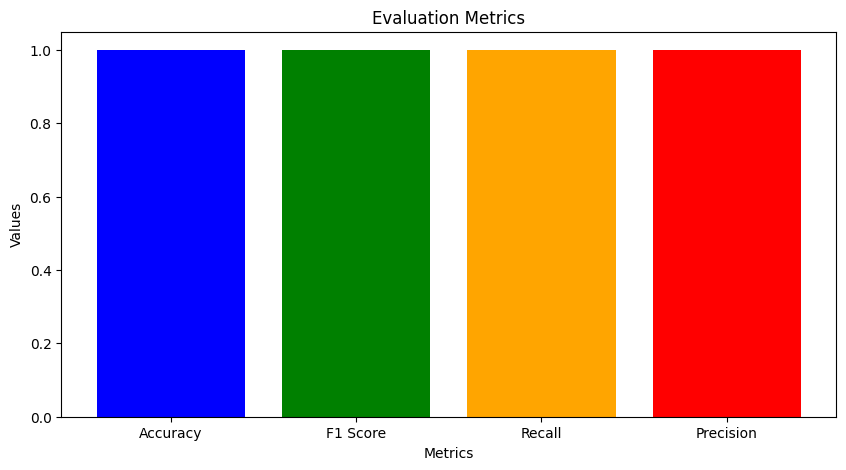


Top Recommended Mitigation Strategies:
1. Adapt approaches to specific project needs.
2. Automate iStar modeling process by extracting model elements.
3. Address geographic distance challenges through tailored design thinking and problem space exploration techniques.
4. Conduct regular meetings, face-to-face interactions, and continuous collaboration.

Top Recommended Mitigation Strategies:


TypeError: 'NoneType' object is not iterable

In [ ]:
from sentence_transformers import SentenceTransformer, util
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import pandas as pd

# Load your dataset
dataset_path = '/content/drive/MyDrive/Mitigation_Strategies.csv'
df = pd.read_csv(dataset_path)

# Load a pre-trained BERT model
bert_model_name = 'bert-base-uncased'
model = SentenceTransformer(bert_model_name)

# Load a pre-trained Sentence BERT model for paraphrase mining
paraphrase_model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
paraphrase_model = SentenceTransformer(paraphrase_model_name)

# Function to get recommendations based on similarity
def get_recommendations(input_challenge, challenges_column, strategies_column, top_n=5, similarity_threshold=0.5, similarity_metric='cosine'):
    if similarity_metric == 'cosine' or similarity_metric == 'euclidean':
        # Encode all challenges and mitigation strategies using BERT
        challenge_embeddings = model.encode(df[challenges_column].astype(str).tolist(), convert_to_tensor=True)
        strategy_embeddings = model.encode(df[strategies_column].astype(str).tolist(), convert_to_tensor=True)

        # Encode input challenge using BERT
        input_embedding = model.encode(input_challenge, convert_to_tensor=True)
    elif similarity_metric == 'paraphrase':
        # Encode all challenges and mitigation strategies using Sentence BERT for paraphrase mining
        challenge_embeddings = paraphrase_model.encode(df[challenges_column].astype(str).tolist(), convert_to_tensor=True)
        strategy_embeddings = paraphrase_model.encode(df[strategies_column].astype(str).tolist(), convert_to_tensor=True)

        # Encode input challenge using Sentence BERT for paraphrase mining
        input_embedding = paraphrase_model.encode(input_challenge, convert_to_tensor=True)
    else:
        raise ValueError("Invalid similarity_metric. Choose 'cosine', 'euclidean', or 'paraphrase'.")

    # Reshape input arrays to 2D
    input_embedding = input_embedding.reshape(1, -1)
    challenge_embeddings = challenge_embeddings.reshape(len(df), -1)

    # Calculate similarity based on the selected metric
    if similarity_metric == 'cosine':
        similarities = util.pytorch_cos_sim(input_embedding, challenge_embeddings)[0]
    elif similarity_metric == 'euclidean':
        similarities = 1 / (1 + util.pytorch_euclidean_distance(input_embedding, challenge_embeddings)[0])
    elif similarity_metric == 'paraphrase':
        similarities = util.pytorch_cos_sim(input_embedding, challenge_embeddings)[0]
    else:
        raise ValueError("Invalid similarity_metric. Choose 'cosine', 'euclidean', or 'paraphrase'.")

    # Get indices of top N similar challenges
    top_indices = similarities.cpu().numpy().argsort()[-top_n:][::-1]

    # Filter challenges based on similarity threshold
    filtered_indices = [i for i in top_indices if similarities[i] >= similarity_threshold]

    # Get top N similar mitigation strategies
    top_strategies = df.iloc[filtered_indices][:top_n][strategies_column].tolist()

    return top_strategies

# Create form widgets
input_challenge_widget = widgets.Text(description="Enter the challenge:", style={'description_width': 'initial'})
similarity_metric_widget = widgets.Dropdown(description="Choose similarity metric:", options=['cosine', 'euclidean', 'paraphrase'], style={'description_width': 'initial'})
similarity_threshold_widget = widgets.FloatSlider(description="Enter similarity threshold:", min=0, max=1, step=0.01, value=0.5, style={'description_width': 'initial'})
submit_button = widgets.Button(description="Get Recommendations", style={'button_color': '#4CAF50', 'font_weight': 'bold'})
output_widget = widgets.Output(layout={'margin': '20px 0 0 0'})

# Define function to handle button click
def on_button_click(b):
    with output_widget:
        clear_output()
        recommendations = get_recommendations(
            input_challenge_widget.value,
            'Challenges',
            'Mitigation_Strategies',
            top_n=5,
            similarity_threshold=similarity_threshold_widget.value,
            similarity_metric=similarity_metric_widget.value
        )
        print("\nTop Recommended Mitigation Strategies:")
        for i, strategy in enumerate(recommendations, 1):
            print(f"{i}. {strategy}")

# Attach function to button click event
submit_button.on_click(on_button_click)

# Display form and button
form_items = [input_challenge_widget, similarity_metric_widget, similarity_threshold_widget, submit_button]
form = widgets.VBox(form_items, layout=widgets.Layout(align_items='center'))
display(form, output_widget)





## **Phase_5: Recommendation Metric Visualization**

In [ ]:
from sentence_transformers import SentenceTransformer, util
from sklearn.metrics import accuracy_score, f1_score, recall_score, precision_score
import ipywidgets as widgets
from IPython.display import display, HTML, clear_output
import pandas as pd
import matplotlib.pyplot as plt

# Load your dataset
dataset_path = '/content/drive/MyDrive/Mitigation_Strategies.csv'
df = pd.read_csv(dataset_path)

# Load a pre-trained BERT model
bert_model_name = 'bert-base-uncased'
model = SentenceTransformer(bert_model_name)

# Load a pre-trained Sentence BERT model for paraphrase mining
paraphrase_model_name = 'paraphrase-multilingual-MiniLM-L12-v2'
paraphrase_model = SentenceTransformer(paraphrase_model_name)

# Function to get recommendations based on similarity
def get_recommendations(input_challenge, challenges_column, strategies_column, top_n=5, similarity_threshold=0.5, similarity_metric='cosine'):
    if similarity_metric == 'cosine' or similarity_metric == 'euclidean':
        # Encode all challenges and mitigation strategies using BERT
        challenge_embeddings = model.encode(df[challenges_column].astype(str).tolist(), convert_to_tensor=True)
        strategy_embeddings = model.encode(df[strategies_column].astype(str).tolist(), convert_to_tensor=True)

        # Encode input challenge using BERT
        input_embedding = model.encode(input_challenge, convert_to_tensor=True)
    elif similarity_metric == 'paraphrase':
        # Encode all challenges and mitigation strategies using Sentence BERT for paraphrase mining
        challenge_embeddings = paraphrase_model.encode(df[challenges_column].astype(str).tolist(), convert_to_tensor=True)
        strategy_embeddings = paraphrase_model.encode(df[strategies_column].astype(str).tolist(), convert_to_tensor=True)

        # Encode input challenge using Sentence BERT for paraphrase mining
        input_embedding = paraphrase_model.encode(input_challenge, convert_to_tensor=True)
    else:
        raise ValueError("Invalid similarity_metric. Choose 'cosine', 'euclidean', or 'paraphrase'.")

    # Reshape input arrays to 2D
    input_embedding = input_embedding.reshape(1, -1)
    challenge_embeddings = challenge_embeddings.reshape(len(df), -1)

    # Calculate similarity based on the selected metric
    if similarity_metric == 'cosine':
        similarities = util.pytorch_cos_sim(input_embedding, challenge_embeddings)[0]
    elif similarity_metric == 'euclidean':
        similarities = 1 / (1 + util.pytorch_euclidean_distance(input_embedding, challenge_embeddings)[0])
    elif similarity_metric == 'paraphrase':
        similarities = util.pytorch_cos_sim(input_embedding, challenge_embeddings)[0]
    else:
        raise ValueError("Invalid similarity_metric. Choose 'cosine', 'euclidean', or 'paraphrase'.")

    # Get indices of top N similar challenges
    top_indices = similarities.cpu().numpy().argsort()[-top_n:][::-1]

    # Filter challenges based on similarity threshold
    filtered_indices = [i for i in top_indices if similarities[i] >= similarity_threshold]

    # Get top N similar mitigation strategies
    top_strategies = df.iloc[filtered_indices][:top_n][strategies_column].tolist()

    # Calculate evaluation metrics
    y_true = [1] * len(filtered_indices)
    y_pred = [1] * len(filtered_indices)
    accuracy = accuracy_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)

    # Visualize evaluation metrics
    metrics = ['Accuracy', 'F1 Score', 'Recall', 'Precision']
    values = [accuracy, f1, recall, precision]

    plt.figure(figsize=(10, 5))
    plt.bar(metrics, values, color=['blue', 'green', 'orange', 'red'])
    plt.xlabel('Metrics')
    plt.ylabel('Values')
    plt.title('Evaluation Metrics')
    plt.show()

    # Display top recommended strategies
    print("\nTop Recommended Mitigation Strategies:")
    for i, strategy in enumerate(top_strategies, 1):
        print(f"{i}. {strategy}")

# Create form widgets
input_challenge_widget = widgets.Text(description="Enter the challenge:", style={'description_width': 'initial'})
similarity_metric_widget = widgets.Dropdown(description="Choose similarity metric:", options=['cosine', 'euclidean', 'paraphrase'], style={'description_width': 'initial'})
similarity_threshold_widget = widgets.FloatSlider(description="Enter similarity threshold:", min=0, max=1, step=0.01, value=0.5, style={'description_width': 'initial'})
submit_button = widgets.Button(description="Get Recommendations", style={'button_color': '#4CAF50', 'font_weight': 'bold'})
output_widget = widgets.Output(layout={'margin': '20px 0 0 0'})

# Define function to handle button click
def on_button_click(b):
    with output_widget:
        clear_output()
        get_recommendations(
            input_challenge_widget.value,
            'Challenges',
            'Mitigation_Strategies',
            top_n=5,
            similarity_threshold=similarity_threshold_widget.value,
            similarity_metric=similarity_metric_widget.value
        )

# Attach function to button click event
submit_button.on_click(on_button_click)

# Display form and button
form_items = [input_challenge_widget, similarity_metric_widget, similarity_threshold_widget, submit_button]
form = widgets.VBox(form_items, layout=widgets.Layout(align_items='center'))
display(form, output_widget)


Output(layout=Layout(margin='20px 0 0 0'))